# Task 2: Visualizing Top 10 Customers per Engagement Metric

## Overview
This task involves visualizing the top 10 customers per engagement metric using horizontal bar charts. The engagement metrics considered in this task include the number of unique Bearer IDs, total duration, total upload bytes, and total download bytes.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [3]:
df = pd.read_csv('loaded_data.csv')

In [4]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,2.980200e+05,300000.000000,300000.000000,3.000000e+05,2.988620e+05,2.978700e+05,2.988580e+05,244344.000000,244378.000000,300000.000000,...,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000000e+05,3.000000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893168e+18,288.611353,288.097173,8.103749e+04,2.148805e+10,2.447439e+12,2.241633e+13,619.781471,84.793351,23971.838588,...,6.710558e+06,6.345413e+06,6.725207e+06,6.359479e+06,2.439671e+08,4.782692e+06,2.432046e+08,4.768996e+06,1.127637e+07,2.441425e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 298020 non-null  float64
 1   Start                                     300000 non-null  object 
 2   Start ms                                  300000 non-null  float64
 3   End                                       300000 non-null  object 
 4   End ms                                    300000 non-null  float64
 5   Dur. (ms)                                 300000 non-null  float64
 6   IMSI                                      298862 non-null  float64
 7   MSISDN/Number                             297870 non-null  float64
 8   IMEI                                      298858 non-null  float64
 9   Last Location Name                        297696 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.isnull().sum()

Bearer Id                                     1982
Start                                            2
Start ms                                         2
End                                              2
End ms                                           2
Dur. (ms)                                        2
IMSI                                          1140
MSISDN/Number                                 2132
IMEI                                          1144
Last Location Name                            2306
Avg RTT DL (ms)                              55658
Avg RTT UL (ms)                              55624
Avg Bearer TP DL (kbps)                          2
Avg Bearer TP UL (kbps)                          2
TCP DL Retrans. Vol (Bytes)                 176292
TCP UL Retrans. Vol (Bytes)                 193298
DL TP < 50 Kbps (%)                           1508
50 Kbps < DL TP < 250 Kbps (%)                1508
250 Kbps < DL TP < 1 Mbps (%)                 1508
DL TP > 1 Mbps (%)             

In [7]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [ ]:
df.dropna(inplace=True)
# Fill missing values in numerical columns with the mean
df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean(), inplace=True)
df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean(), inplace=True)

In [ ]:
# Fill missing values in categorical columns with the most frequent value
df['Last Location Name'].fillna(df['Last Location Name'].mode()[0], inplace=True)

In [10]:
# Drop columns with a high number of missing values
threshold = 0.5  # Set the threshold for the percentage of missing values
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
print(df.columns)

Aggregation Part

In [37]:
# Aggregate engagement metrics per customer ID
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Count the number of unique Bearer Ids
    'Dur. (ms)': 'sum',  # Sum of total duration
    'Total UL (Bytes)': 'sum',  # Sum of total upload bytes
    'Total DL (Bytes)': 'sum'  # Sum of total download bytes
})

# Rename the columns for better understanding (optional)
engagement_metrics.columns = ['Num_of_Unique_Bearer_Id', 'Total_Duration', 'Total_UL_Bytes', 'Total_DL_Bytes']

# Report top 10 customers per engagement metric
top_10_sessions_frequency = engagement_metrics['Num_of_Unique_Bearer_Id'].nlargest(10)
top_10_session_duration = engagement_metrics['Total_Duration'].nlargest(10)
top_10_session_total_ul_bytes = engagement_metrics['Total_UL_Bytes'].nlargest(10)
top_10_session_total_dl_bytes = engagement_metrics['Total_DL_Bytes'].nlargest(10)

print("Top 10 Customers by Number of Unique Bearer Ids:")
print(top_10_sessions_frequency)

print("Top 10 Customers by Total Duration:")
print(top_10_session_duration)

print("Top 10 Customers by Total UL Bytes:")
print(top_10_session_total_ul_bytes)

print("Top 10 Customers by Total DL Bytes:")
print(top_10_session_total_dl_bytes)

Top 10 Customers by Number of Unique Bearer Ids:
MSISDN/Number
3.365955e+10    14
3.365073e+10    12
3.365813e+10    12
3.366130e+10    12
3.366180e+10    12
3.366258e+10    12
3.366518e+10    12
3.366552e+10    12
3.366578e+10    12
3.369844e+10    12
Name: Num_of_Unique_Bearer_Id, dtype: int64
Top 10 Customers by Total Duration:
MSISDN/Number
3.366893e+10    4738546.0
3.363004e+10    4048420.0
3.365955e+10    3793376.0
3.366284e+10    3256942.0
3.369870e+10    2764816.0
3.369881e+10    2759188.0
3.366884e+10    2700252.0
3.366842e+10    2666526.0
3.365996e+10    2639290.0
3.376745e+10    2593346.0
Name: Total_Duration, dtype: float64
Top 10 Customers by Total UL Bytes:
MSISDN/Number
3.365955e+10    608550688.0
3.369844e+10    598691068.0
3.366130e+10    532044130.0
3.376378e+10    522116442.0
3.366518e+10    514842380.0
3.366149e+10    513630402.0
3.366233e+10    500659910.0
3.366060e+10    497490896.0
3.376373e+10    493810842.0
3.366258e+10    491580720.0
Name: Total_UL_Bytes, dtyp

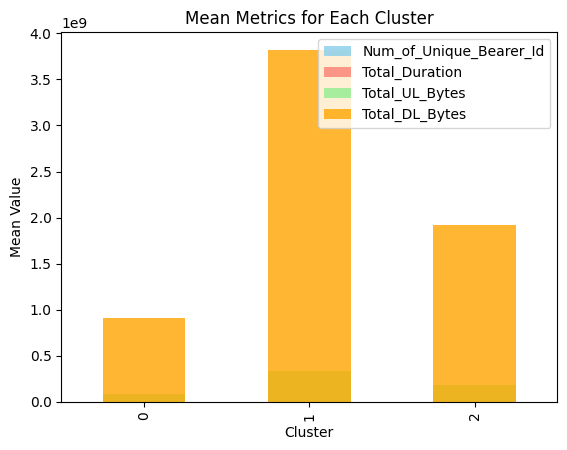

In [31]:
# Normalize engagement metrics
scaler = StandardScaler()
normalized_engagement_metrics = scaler.fit_transform(engagement_metrics)

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
engagement_clusters = kmeans.fit_predict(normalized_engagement_metrics)

# Compute and print metrics for each cluster
engagement_metrics['Cluster'] = engagement_clusters
cluster_summary = engagement_metrics.groupby('Cluster').agg(['min', 'max', 'mean', 'sum'])

# Visualize results
# Plotting the mean values of each metric for each cluster
cluster_summary['Num_of_Unique_Bearer_Id']['mean'].plot(kind='bar', color='skyblue', alpha=0.8, legend=True, label='Num_of_Unique_Bearer_Id')
cluster_summary['Total_Duration']['mean'].plot(kind='bar', color='salmon', alpha=0.8, legend=True, label='Total_Duration')
cluster_summary['Total_UL_Bytes']['mean'].plot(kind='bar', color='lightgreen', alpha=0.8, legend=True, label='Total_UL_Bytes')
cluster_summary['Total_DL_Bytes']['mean'].plot(kind='bar', color='orange', alpha=0.8, legend=True, label='Total_DL_Bytes')

plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Metrics for Each Cluster')
plt.legend()
plt.show()

Aggregate User Total Traffic per Application

In [22]:
# Aggregate user total traffic per application
user_app_traffic = df.groupby('Handset Manufacturer').agg({'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'})

# Combine total UL and DL traffic to get total traffic
user_app_traffic['Total Traffic'] = user_app_traffic['Total UL (Bytes)'] + user_app_traffic['Total DL (Bytes)']

# Report top 10 most engaged users per application
top_10_users_per_app = user_app_traffic['Total Traffic'].groupby('Handset Manufacturer').nlargest(10)
print("Top 10 Most Engaged Users per Handset Manufacturer:")
print(top_10_users_per_app)

Top 10 Most Engaged Users per Handset Manufacturer:
Handset Manufacturer                              Handset Manufacturer                            
ASUSTeK                                           ASUSTeK                                             2.775525e+09
Apple                                             Apple                                               4.289113e+12
Archos Sa                                         Archos Sa                                           3.403991e+09
Asustek                                           Asustek                                             1.658209e+10
Bird                                              Bird                                                9.044778e+08
Crosscall                                         Crosscall                                           1.365514e+09
D-Link Corporation                                D-Link Corporation                                  5.248201e+09
Dn Electronics                              

Top 3 Application mostly used

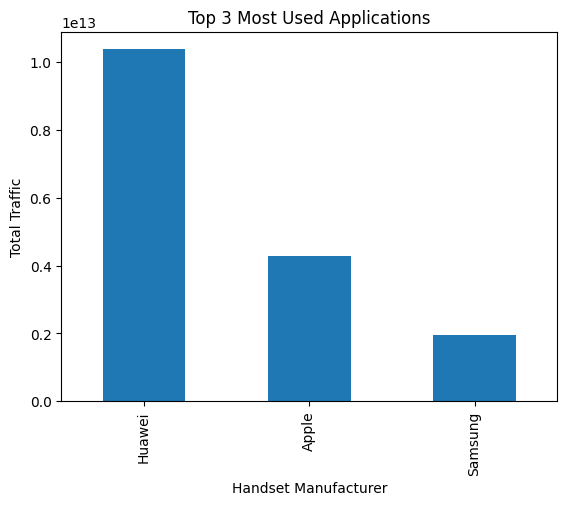

In [23]:
# Plot the top 3 most used applications
top_3_applications = user_app_traffic['Total Traffic'].nlargest(3)
top_3_applications.plot(kind='bar', title='Top 3 Most Used Applications')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Total Traffic')
plt.show()

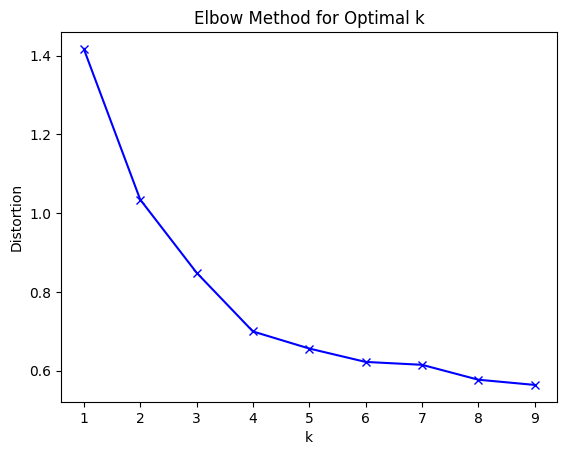

In [25]:
# Determine the optimal value of k using the elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_engagement_metrics)
    distortions.append(sum(np.min(cdist(normalized_engagement_metrics, kmeans.cluster_centers_, 'euclidean'), axis=1)) / normalized_engagement_metrics.shape[0])

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()